<a href="https://colab.research.google.com/github/Niharika-Ravela/Niharika_INFO5502_Summer2022/blob/main/lab_assignment_06_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The sixth Lab-assignment (08/02/2022 11:59'AM' - 08/05/2022 11:59PM, 50 points in total)

The purpose of this exercise is to build a simple predicition model which can helpyou understand the workflow of machine learning. 

### Q1 Task Decription (50 Points)

The goal of this assignment is to predict bike share use, given the hour, day, and information about the weather. Companies like Divvy try to predict how much demand there will be for bikes on any given day to allocate resources to redistribute bikes so that, ideally, very few bike stations are ever full (when you can’t park your bike) or empty (when you can’t pick up a bike if you want to).

The data (link: https://github.com/suthapalliuday/INFO5502-Summer2022/tree/main/datasets/lab_assignment_06) in Github provides detailed information on the data set and necessary downloads.

### Data Description

You are provided hourly rental data spanning two years (link: https://github.com/suthapalliuday/INFO5502-Summer2022/tree/main/datasets/lab_assignment_06). For this task, the training set is comprised of the first 16 days of each month, while the test set is the 17-19th day of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period. That is, predict "count" without using "count" or its components "casual" and "registered".

Data Fields

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1 - Clear, Few clouds, Partly cloudy, Partly cloudy

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Output

Submission Format

Your output (a separate file) must have a header line and should be structured in the following format:

 datetime,count
 
 2011-01-20 00:00:00,0 
 
 2011-01-20 01:00:00,0
 
 2011-01-20 02:00:00,0
 
 ...
 
The tutorial code should demonstrate how to generate such a file from a very simple prediction model. Note, these prediction are to be done on the test file under the data tab, where you do not know the actual count, and should match the rows of the test file in count and order.

Your predictions should be compared to the ground truth information (sample_prediction.csv). Score are calculated using Root Mean Squared Error (RMSE).

### Tips

●	Add features: Pick columns/features from the data you already have. Or make a new feature from the ones you have. For example, the tutorial makes ‘hour’ from the datetime stamp, which seemed very useful. How about ‘month’?

●	Model selection: Try different models. Make sure they are regression models rather than classification models. Tip: random forest regression is a good, all around modeling strategy on complicated data sets.

●	Model tuning: Almost all regression models have parameters to tune (“hyperparameters”). E.g. polynomial regression has the degree of the polynomial (n = 1 for a line, n=2 for a quadratic fit, n=3 for a cubic fit…). Generally, one extreme makes the model too simple (e.g. a line for a curved set of points) and the other extreme makes the model overfit/be too complex, and usually the right choice is in between. For some models it is obvious what to tune (e.g. k for k nearest neighbors regression) and some don’t need much tuning with defaults that often work well. e.g. try changing the number of trees used in the random forest model!

●	Cross validation: The tutorial has a simple way of separating training and test data, however, there are better ways of splitting training and test data. Look into cross validation techniques, which are more reliable than an arbitrary split of training and test data.

●	Separate models for ...: Notice that count comes from just adding casual riders and registered riders. However, what if these two types of riders acted very differently? It might make sense to make two separate models and just add the results of both models together. This is also true for any subsets of your data that may behave wildly differently (e.g. create a separate model for each season?)

### Your code

In [1]:
### You code here:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns



df = pd.read_csv("https://raw.githubusercontent.com/suthapalliuday/INFO5502-Summer2022/main/datasets/lab_assignment_06/train_luc.csv")
df.head()



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9174 entries, 0 to 9173
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    9174 non-null   object 
 1   season      9174 non-null   int64  
 2   holiday     9174 non-null   int64  
 3   workingday  9174 non-null   int64  
 4   weather     9174 non-null   int64  
 5   temp        9174 non-null   float64
 6   atemp       9174 non-null   float64
 7   humidity    9174 non-null   int64  
 8   windspeed   9174 non-null   float64
 9   casual      9174 non-null   int64  
 10  registered  9174 non-null   int64  
 11  count       9174 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 860.2+ KB


In [3]:
from datetime import datetime
df['datetime']=pd.to_datetime(df.datetime)
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


In [4]:
# Visualizations to understand the data and patterns
df['season'] = df['season'].replace(1,'Spring')
df['season'] = df['season'].replace(2,'Summer')
df['season'] = df['season'].replace(3,'Fall')
df['season'] = df['season'].replace(4,'Winter')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,Spring,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,1,1
1,2011-01-01 01:00:00,Spring,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1
2,2011-01-01 02:00:00,Spring,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,1,1
3,2011-01-01 03:00:00,Spring,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,1,1
4,2011-01-01 04:00:00,Spring,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9169,2012-12-16 19:00:00,Winter,0,0,1,14.76,17.425,93,8.9981,10,99,109,19,16,12
9170,2012-12-16 20:00:00,Winter,0,0,2,15.58,19.695,82,0.0000,14,108,122,20,16,12
9171,2012-12-16 21:00:00,Winter,0,0,2,14.76,18.940,93,0.0000,14,92,106,21,16,12
9172,2012-12-16 22:00:00,Winter,0,0,2,16.40,20.455,82,12.9980,6,83,89,22,16,12


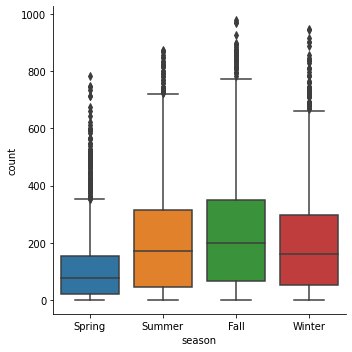

In [5]:
sns.catplot(x="season", y="count", kind="box", data=df,legend = True)

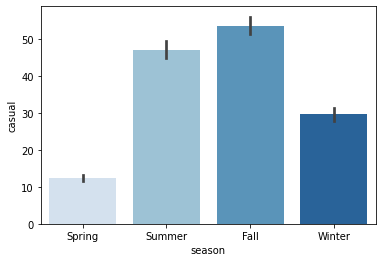

In [6]:
sns.barplot(x ='season', y ='casual', data = df, palette ='Blues')

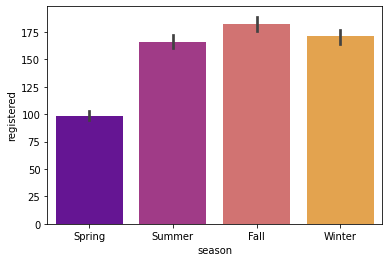

In [7]:
sns.barplot(x ='season', y ='registered', data = df, palette ='plasma')

Text(0.5, 1.0, 'Usage of the Bikes')

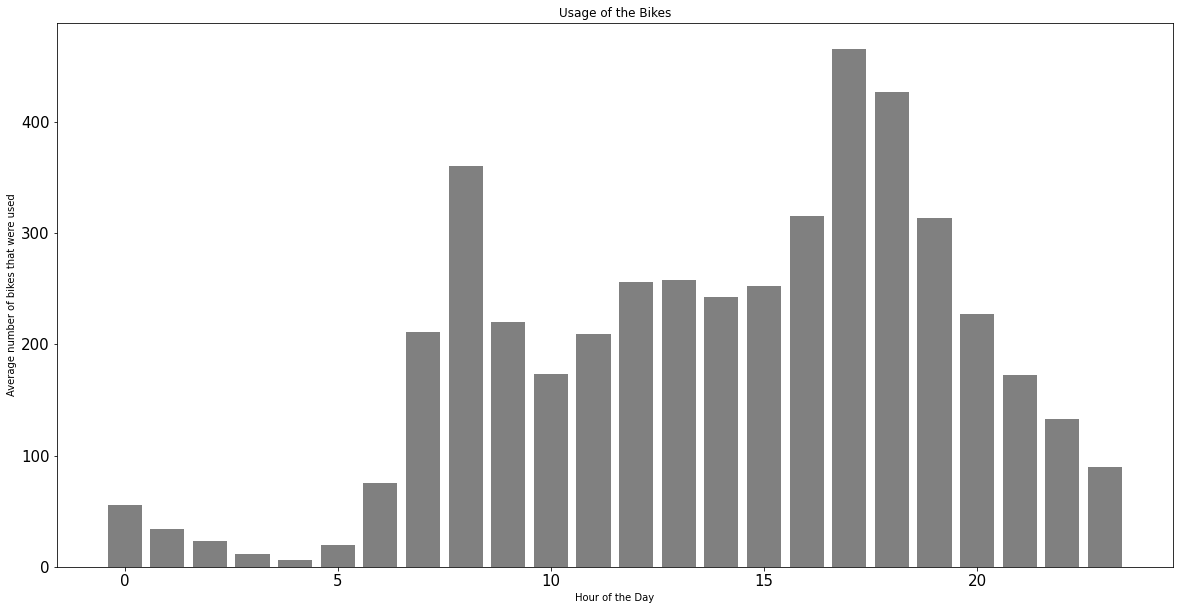

In [8]:
hrs = np.unique(df['hour'])
mean_hr = {}
for i in hrs:
    temp_df = df.loc[df['hour'] == i]
    mean_hr[i] = temp_df['count'].mean()

plt.rcParams['figure.figsize'] = (20,10)
plt.bar(hrs,[mean_hr[i] for i in hrs],color = 'grey')
plt.xlabel("Hour of the Day")
plt.ylabel("Average number of bikes that were used")
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title("Usage of the Bikes")

In [9]:
cols =['weather','atemp','humidity','windspeed','day','hour']
X = df[cols]
print(X)
X = preprocessing.scale(X) 
y = df['count'].values
y = preprocessing.scale(y) 
casual=df['casual'].values
casual= preprocessing.scale(casual)
registered=df['registered'].values
registered= preprocessing.scale(registered)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)
X_train_cas,X_test_cas,y_train_cas,y_test_cas = train_test_split(X,casual,test_size=0.3,random_state=0)
X_train_reg,X_test_reg,y_train_reg,y_test_reg = train_test_split(X,registered,test_size=0.3,random_state=0)


      weather   atemp  humidity  windspeed  day  hour
0           1  14.395        81     0.0000    1     0
1           1  13.635        80     0.0000    1     1
2           1  13.635        80     0.0000    1     2
3           1  14.395        75     0.0000    1     3
4           1  14.395        75     0.0000    1     4
...       ...     ...       ...        ...  ...   ...
9169        1  17.425        93     8.9981   16    19
9170        2  19.695        82     0.0000   16    20
9171        2  18.940        93     0.0000   16    21
9172        2  20.455        82    12.9980   16    22
9173        2  17.425        93     8.9981   16    23

[9174 rows x 6 columns]


In [10]:
model_linear_reg = LinearRegression()

model_linear_reg.fit(X_train, y_train)
model_linear_reg.fit(X_train_cas, y_train_cas)
model_linear_reg.fit(X_train_reg, y_train_reg)
predicted_count = model_linear_reg.predict(X_test)
predicted_casual = model_linear_reg.predict(X_test_cas)
predicted_resgistered = model_linear_reg.predict(X_test_reg)

root_mean_error = np.sqrt(mean_squared_error(y_test,predicted_count))
print("RMS error:",root_mean_error)
root_mean_error_for_casual=np.sqrt(mean_squared_error(y_test_cas,predicted_casual))
print("RMS error for casual:",root_mean_error_for_casual)
root_mean_error_for_regis=np.sqrt(mean_squared_error(y_test_reg,predicted_resgistered))
print("RMS error for registered:",root_mean_error_for_regis)

RMS error: 0.8035351697739582
RMS error for casual: 0.8382161371601936
RMS error for registered: 0.8864276767814694


In [11]:
model_decision_tree_reg = DecisionTreeRegressor()

model_decision_tree_reg.fit(X_train, y_train)
model_decision_tree_reg.fit(X_train_cas, y_train_cas)
model_decision_tree_reg.fit(X_train_reg, y_train_reg)
predicted_count = model_decision_tree_reg.predict(X_test)
predicted_casual = model_decision_tree_reg.predict(X_test_cas)
predicted_resgistered = model_decision_tree_reg.predict(X_test_reg)

root_mean_error = np.sqrt(mean_squared_error(y_test,predicted_count))
print("RMS error:",root_mean_error)
root_mean_error_for_casual=np.sqrt(mean_squared_error(y_test_cas,predicted_casual))
print("RMS error for casual:",root_mean_error_for_casual)
root_mean_error_for_regis=np.sqrt(mean_squared_error(y_test_reg,predicted_resgistered))
print("RMS error for registered:",root_mean_error_for_regis)

RMS error: 0.46415010143739394
RMS error for casual: 1.0690596631275278
RMS error for registered: 0.7777022397582952


In [12]:
model_knn_reg = KNeighborsRegressor(n_neighbors = 4)

model_knn_reg.fit(X_train, y_train)
model_knn_reg.fit(X_train_cas, y_train_cas)
model_knn_reg.fit(X_train_reg, y_train_reg)
predicted_count = model_knn_reg.predict(X_test)
predicted_casual = model_knn_reg.predict(X_test_cas)
predicted_resgistered = model_knn_reg.predict(X_test_reg)

root_mean_error = np.sqrt(mean_squared_error(y_test,predicted_count))
print("RMS error:",root_mean_error)
root_mean_error_for_casual=np.sqrt(mean_squared_error(y_test_cas,predicted_casual))
print("RMS error for casual:",root_mean_error_for_casual)
root_mean_error_for_regis=np.sqrt(mean_squared_error(y_test_reg,predicted_resgistered))
print("RMS error for registered:",root_mean_error_for_regis)

RMS error: 0.5865573239010198
RMS error for casual: 0.8859267981877076
RMS error for registered: 0.7623249806006155


In [13]:
model_random_forest_reg = RandomForestRegressor(max_depth=120,n_estimators = 1000, max_features=3, min_samples_leaf=3,min_samples_split=8  )

model_random_forest_reg.fit(X_train, y_train)
model_random_forest_reg.fit(X_train_cas, y_train_cas)
model_random_forest_reg.fit(X_train_reg, y_train_reg)
predicted_count = model_random_forest_reg.predict(X_test)
predicted_casual = model_random_forest_reg.predict(X_test_cas)
predicted_resgistered = model_random_forest_reg.predict(X_test_reg)

root_mean_error = np.sqrt(mean_squared_error(y_test,predicted_count))
print("RMS error:",root_mean_error)
root_mean_error_for_casual=np.sqrt(mean_squared_error(y_test_cas,predicted_casual))
print("RMS error for casual:",root_mean_error_for_casual)
root_mean_error_for_regis=np.sqrt(mean_squared_error(y_test_reg,predicted_resgistered))
print("RMS error for registered:",root_mean_error_for_regis)

RMS error: 0.45933314471869874
RMS error for casual: 0.8928889461906626
RMS error for registered: 0.5772781402649616


In [14]:
test_sample = pd.read_csv('https://raw.githubusercontent.com/suthapalliuday/INFO5502-Summer2022/main/datasets/lab_assignment_06/test_luc.csv')
print(" count of samples : ",test_sample.shape[0] ,"count of features : ",test_sample.shape[1],"\n")

date_time_conv=pd.to_datetime(test_sample['datetime'])
test_sample['hour'] = date_time_conv.dt.strftime('%-H')
test_sample['day']=date_time_conv.dt.dayofweek
test_sample['month'] = date_time_conv.dt.strftime('%m')

model_random_forest_reg.fit( df[cols], df['count'])
predicted_count = model_random_forest_reg.predict(test_sample[cols])
model_random_forest_reg.fit( df[cols], df['casual'])
predicted_casual = model_random_forest_reg.predict(test_sample[cols])
model_random_forest_reg.fit( df[cols], df['registered'])
predicted_registered = model_random_forest_reg.predict(test_sample[cols])

test_sample['count'] = predicted_count
test_sample['casual'] = predicted_casual
test_sample['registered'] = predicted_registered
test_sample['sum'] = predicted_casual + predicted_registered

data_sample = pd.read_csv('https://raw.githubusercontent.com/suthapalliuday/INFO5502-Summer2022/main/datasets/lab_assignment_06/sample_prediction.csv')


print("RMS error : ",np.sqrt(mean_squared_error(data_sample['count'], predicted_casual + predicted_registered)))
print("RMS error : ",np.sqrt(mean_squared_error(data_sample['count'], predicted_count)))

# saving the output to CSV 
sep_count = test_sample[['datetime','count','casual','registered','sum']].to_csv('sep_count.csv',    index=False, header=True)

final_result = test_sample[['datetime','count']].to_csv('final_result.csv',    index=False, header=True)

 count of samples :  1712 count of features :  9 

RMS error :  74.5867395499616
RMS error :  74.2196954436687


 Question 2 (20 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

 ### Your code

In [15]:
### You code here:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/suthapalliuday/INFO5502-Summer2022/main/datasets/portfolio_data.csv")
df.head()


,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1520 non-null   object 
 1   AMZN    1520 non-null   float64
 2   DPZ     1520 non-null   float64
 3   BTC     1520 non-null   float64
 4   NFLX    1520 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.5+ KB


In [17]:
df.describe()

,AMZN,DPZ,BTC,NFLX
count,1520.000000,1520.000000,1520.000000,1520.000000
mean,821.541810,146.771695,2421.465669,147.668273
std,518.442653,72.192287,3310.894199,107.641486
min,248.229996,51.190983,69.660004,29.464285
25%,364.360001,84.993593,340.904999,62.851071
50%,686.459992,127.168053,625.304993,104.000000
75%,1121.287536,202.454994,3874.912415,192.207496
max,2039.510010,298.635986,18972.320310,418.970001


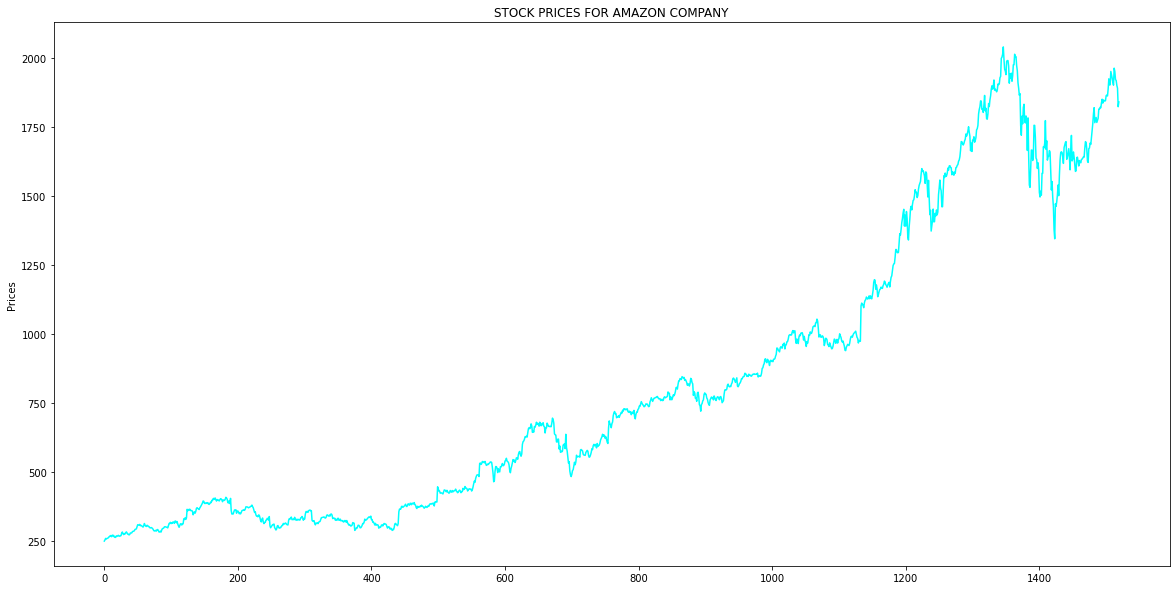

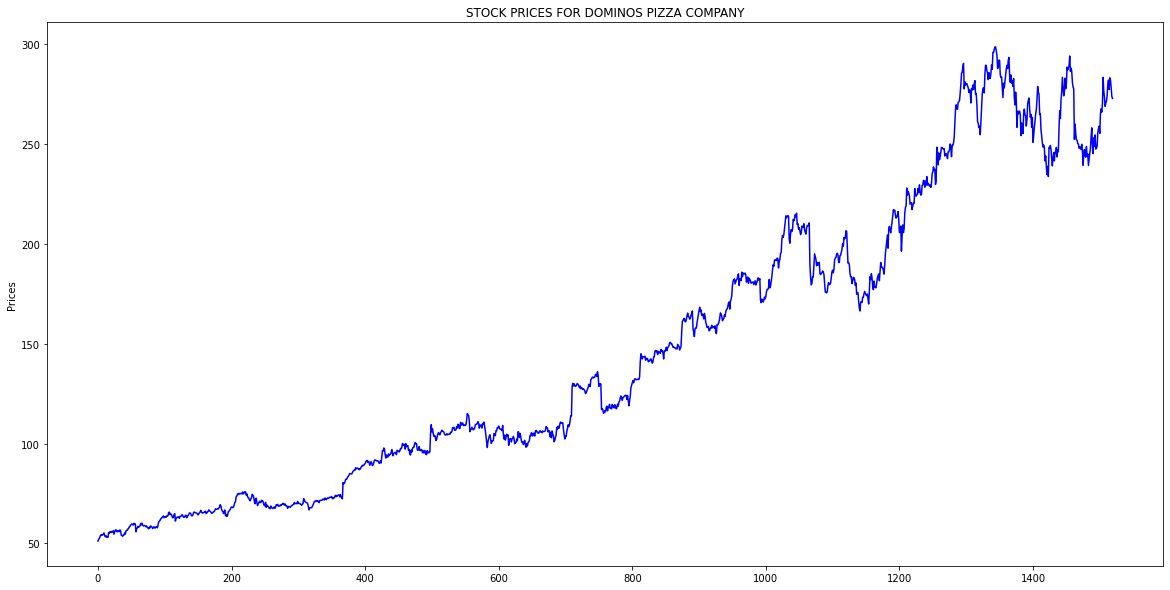

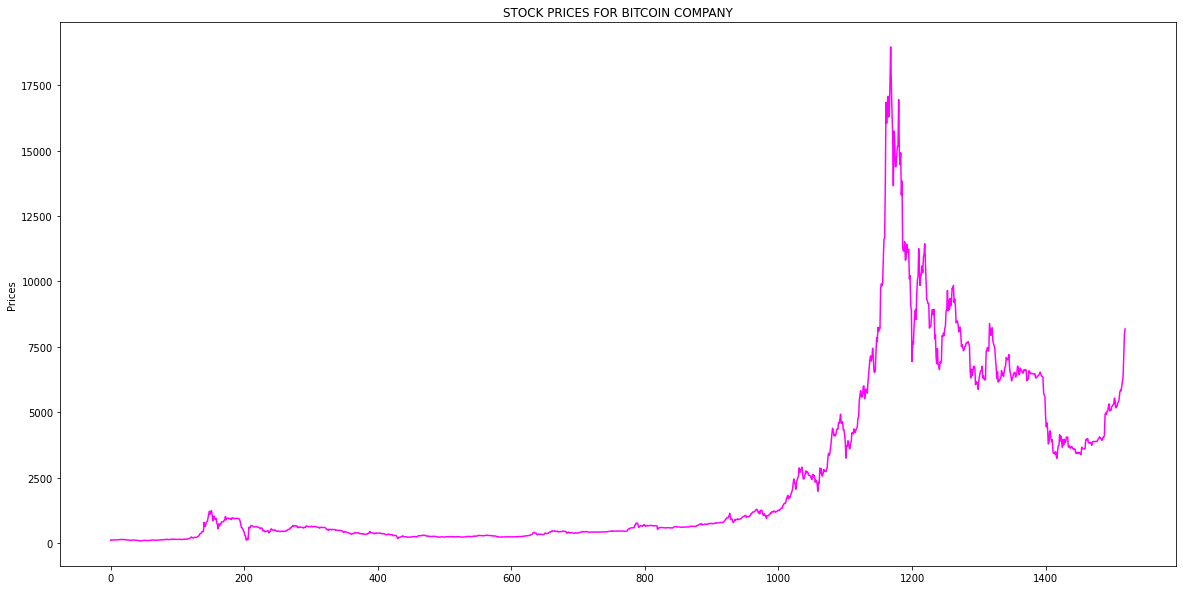

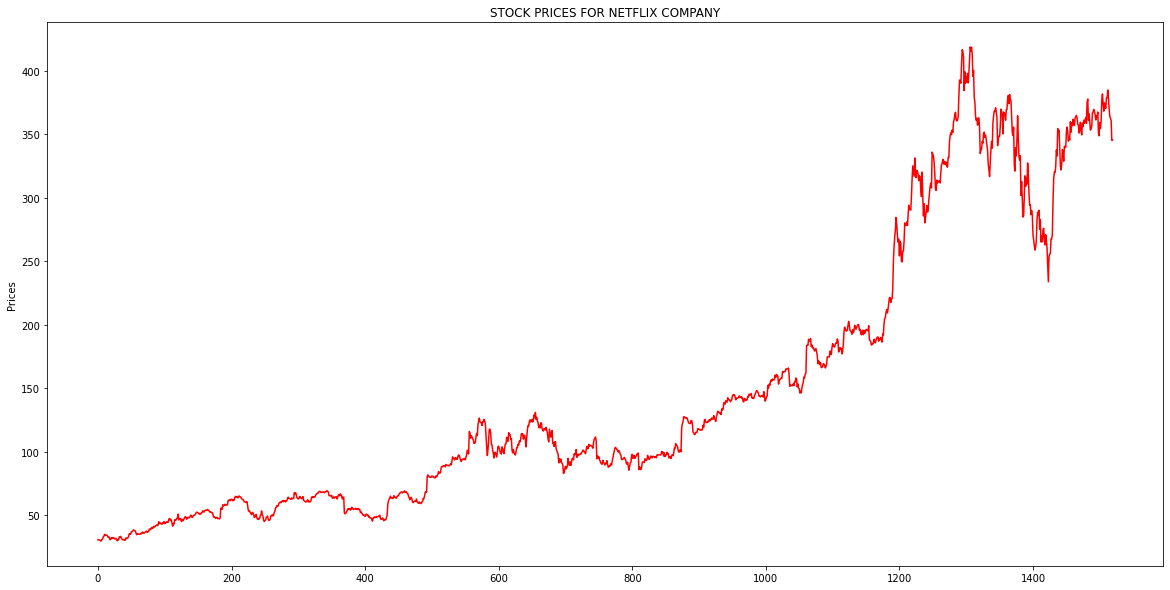

In [18]:
Stock_Price_Amazon = df[['AMZN']] 
Stock_Price_Amazon.AMZN.plot(figsize=(20,10),color = 'cyan')
plt.title('STOCK PRICES FOR AMAZON COMPANY')
plt.ylabel('Prices')
plt.show()
print('\n')

Stock_Price_Dominos = df[['DPZ']] 
Stock_Price_Dominos.DPZ.plot(figsize=(20,10),color = 'blue')
plt.title('STOCK PRICES FOR DOMINOS PIZZA COMPANY')
plt.ylabel('Prices')
plt.show()
print('\n')

Stock_Price_Bitcoin= df[['BTC']] 
Stock_Price_Bitcoin.BTC.plot(figsize=(20,10),color = 'magenta')
plt.title('STOCK PRICES FOR BITCOIN COMPANY')
plt.ylabel('Prices')
plt.show()
print('\n')

Stock_Price_Netflix = df[['NFLX']] 
Stock_Price_Netflix.NFLX.plot(figsize=(20,10),color = 'red')
plt.title('STOCK PRICES FOR NETFLIX COMPANY')
plt.ylabel('Prices')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


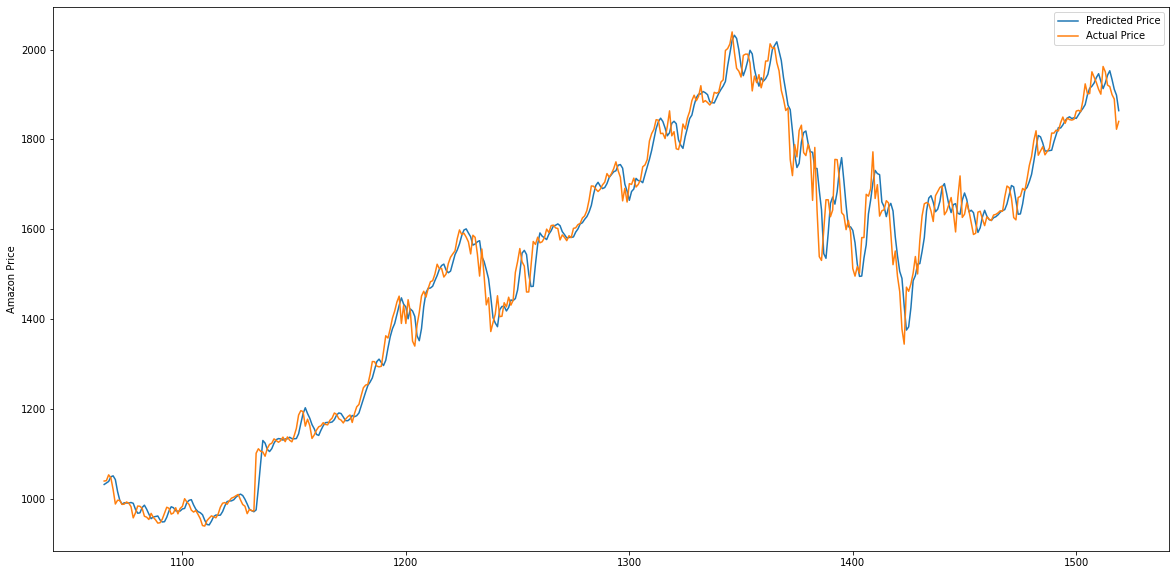

In [19]:
from sklearn.linear_model import LinearRegression

amzn = df[['AMZN']] 
amzn['M-3'] = amzn['AMZN'].shift(1).rolling(window=3).mean() 
amzn['M-6']= amzn['AMZN'].shift(1).rolling(window=6).mean() 
amzn= amzn.dropna()
X_amzn = amzn[['M-3','M-6']] 
Y_amzn = amzn['AMZN']
t_size=.70
t_size = int(t_size*len(amzn)) 
X_train_amzn = X_amzn[:t_size] 
y_train_amzn = Y_amzn[:t_size]  
X_test_amzn = X_amzn[t_size:] 
y_test_amzn = Y_amzn[t_size:]
linear_reg_amzn = LinearRegression().fit(X_train_amzn,y_train_amzn) 
predicted_price_amzn = linear_reg_amzn.predict(X_test_amzn)
predicted_price_amzn = pd.DataFrame(predicted_price_amzn,index=y_test_amzn.index,columns = ['price']) 
predicted_price_amzn.plot(figsize=(20,10)) 
y_test_amzn.plot()  
plt.legend(['Predicted Price','Actual Price'])  
plt.ylabel("Amazon Price")  
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


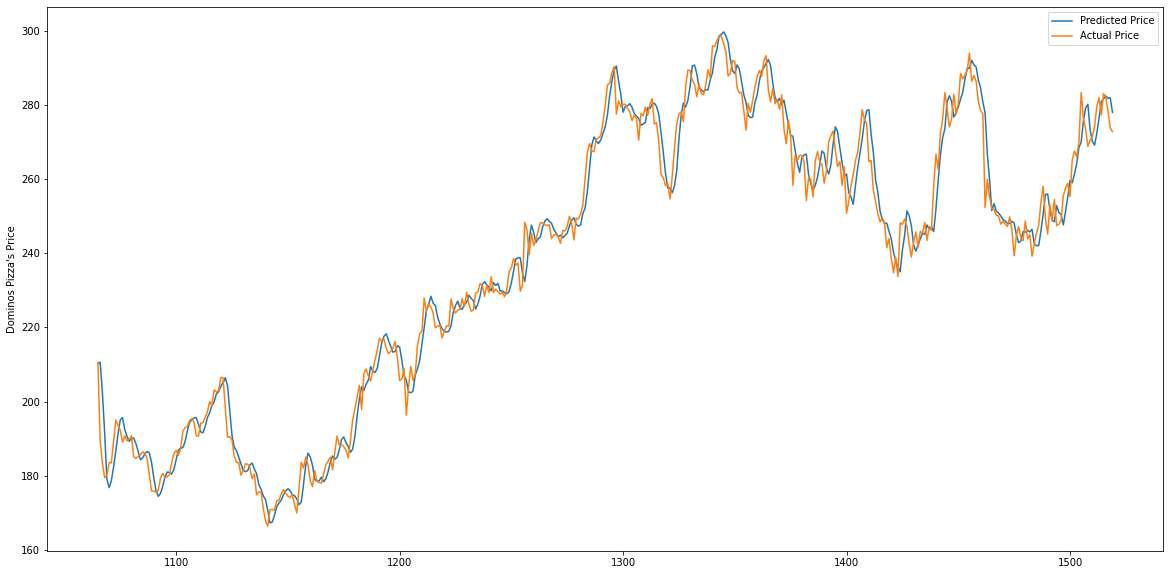

In [20]:
dominos = df[['DPZ']] 
dominos['M-3'] = dominos['DPZ'].shift(1).rolling(window=3).mean() 
dominos['M-6']= dominos['DPZ'].shift(1).rolling(window=6).mean() 
dominos= dominos.dropna()
X_dominos = dominos[['M-3','M-6']] 
Y_dominos = dominos['DPZ']
t_size=.70
t_size = int(t_size*len(dominos)) 
X_train_dominos = X_dominos[:t_size] 
y_train_dominos = Y_dominos[:t_size]  
X_test_dominos = X_dominos[t_size:] 
y_test_dominos = Y_dominos[t_size:]
linear_reg_dominos = LinearRegression().fit(X_train_dominos,y_train_dominos) 
predicted_price_dominos = linear_reg_dominos.predict(X_test_dominos)
predicted_price_dominos = pd.DataFrame(predicted_price_dominos,index=y_test_dominos.index,columns = ['price']) 
predicted_price_dominos.plot(figsize=(20,10)) 
y_test_dominos.plot()  
plt.legend(['Predicted Price','Actual Price'])  
plt.ylabel("Dominos Pizza's Price")  
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


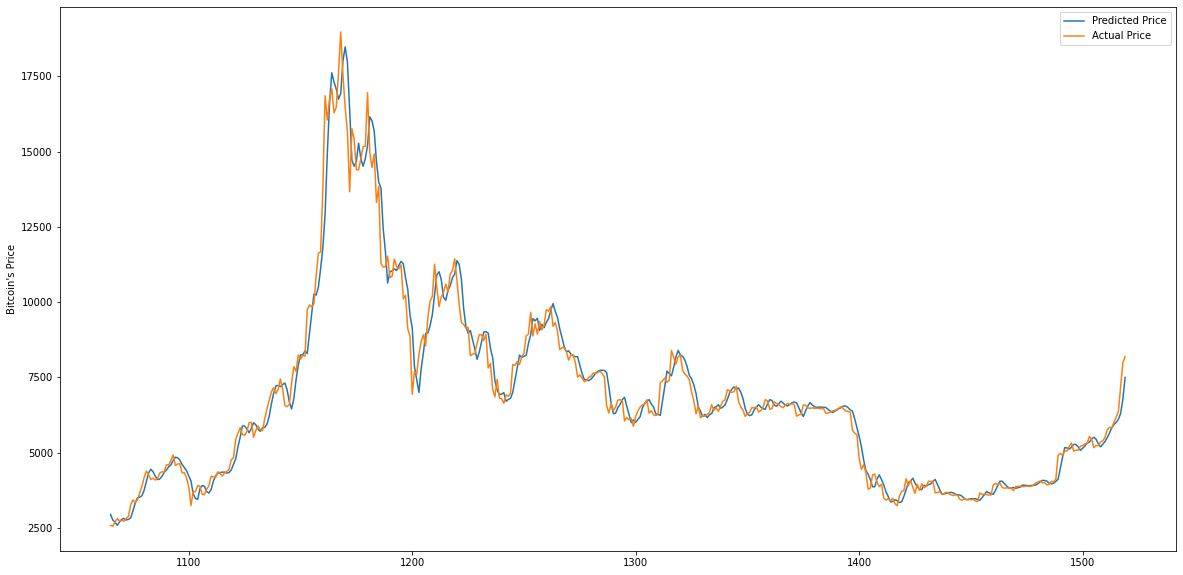

In [21]:
bitcoin = df[['BTC']] 
bitcoin['M-3'] = bitcoin['BTC'].shift(1).rolling(window=3).mean() 
bitcoin['M-6']= bitcoin['BTC'].shift(1).rolling(window=6).mean() 
bitcoin= bitcoin.dropna()
X_bitcoin = bitcoin[['M-3','M-6']] 
Y_bitcoin = bitcoin['BTC']
t_size=.70
t_size = int(t_size*len(bitcoin)) 
X_train_bitcoin = X_bitcoin[:t_size] 
y_train_bitcoin = Y_bitcoin[:t_size]  
X_test_bitcoin = X_bitcoin[t_size:] 
y_test_bitcoin = Y_bitcoin[t_size:]
linear_reg_bitcoin = LinearRegression().fit(X_train_bitcoin,y_train_bitcoin) 
predicted_price_bitcoin = linear_reg_bitcoin.predict(X_test_bitcoin)
predicted_price_bitcoin = pd.DataFrame(predicted_price_bitcoin,index=y_test_bitcoin.index,columns = ['price']) 
predicted_price_bitcoin.plot(figsize=(20,10)) 
y_test_bitcoin.plot()  
plt.legend(['Predicted Price','Actual Price'])  
plt.ylabel("Bitcoin's Price")  
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


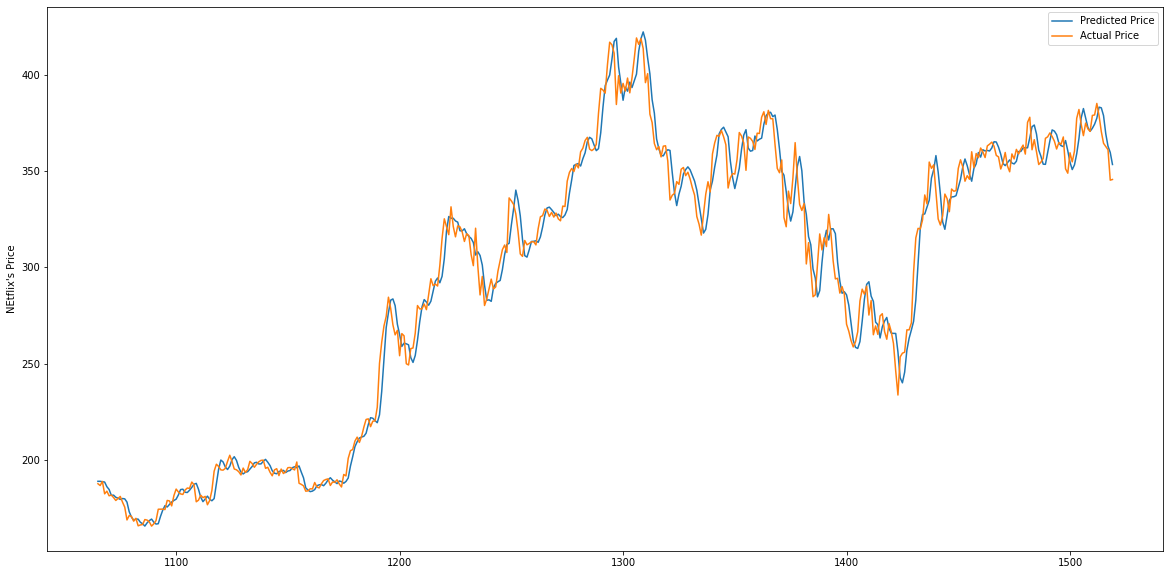

In [22]:
netflix = df[['NFLX']] 
netflix['M-3'] = netflix['NFLX'].shift(1).rolling(window=3).mean() 
netflix['M-6']= netflix['NFLX'].shift(1).rolling(window=6).mean() 
netflix= netflix.dropna()
X_netflix = netflix[['M-3','M-6']] 
Y_netflix = netflix['NFLX']
t_size=.70
t_size = int(t_size*len(netflix)) 
X_train_netflix = X_netflix[:t_size] 
y_train_netflix = Y_netflix[:t_size]  
X_test_netflix = X_netflix[t_size:] 
y_test_netflix = Y_netflix[t_size:]
linear_reg_netflix = LinearRegression().fit(X_train_netflix,y_train_netflix) 
predicted_price_netflix = linear_reg_netflix.predict(X_test_netflix)
predicted_price_netflix = pd.DataFrame(predicted_price_netflix,index=y_test_netflix.index,columns = ['price']) 
predicted_price_netflix.plot(figsize=(20,10)) 
y_test_netflix.plot()  
plt.legend(['Predicted Price','Actual Price'])  
plt.ylabel("NEtflix's Price")  
plt.show()